# ECON 621 Final Project

Yan Naing Aung and Bhavesh Ram

## Project Background
Our project focuses on the relationship between sustainable practices in beer production and consumers' willingness to purchase them at a premium. To analyze this relationship, we use the data set from https://data.mendeley.com/datasets/4z748jnnjs/2. We will begin by cleaning the data and optimizing our data frames for formal analysis. We will be using multinomial and logistic regression to determine which sustainable attribute has the highest impact on consumers' willingness to pay a premium for beers at four different price points. We use marginal effect analysis to find the drivers behind purchases of beer at premium prices, and further tabulate our data to identify average premiums paid per category of sustainability labelling.

These categories are Water Conservation (EC_Water), Efficient energy use (EC_Carbon), and Solid waste reduction (EC_Landfill). We also evaluate our decision drivers which are Packaging (glass or aluminium can EC_Packaging) and Locally produced beer (EC_Localness).

## Importing Packages and Data

In [1]:
import numpy as np 
import pandas as pd
from scipy import optimize
import statsmodels.api as sm

In [2]:
df = pd.read_csv('beer_data.csv')
df

,Gender,Age_sub21,Age_21to24,Age_25to34,Age_35to44,Age_45to54,Age_55to64,Age_65plus,Educ_NoHSdip,Educ_HSdip,...,EnvContribution_PrefNoAnswer,Alternative,Beer,Choice,EC_Water,EC_Package,EC_Carbon,EC_Landfill,EC_Localness,ASC
0,1,0,1,0,0,0,0,0,0,0,...,1,1,1,0,-1,1,-1,-1,-1,0
1,1,0,1,0,0,0,0,0,0,0,...,1,2,2,1,1,-1,1,1,1,0
2,1,0,1,0,0,0,0,0,0,0,...,1,3,3,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,-1,0
4,1,0,1,0,0,0,0,0,0,0,...,1,2,2,1,1,-1,-1,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30979,1,0,0,0,1,0,0,0,0,0,...,0,2,2,0,-1,-1,1,-1,1,0
30980,1,0,0,0,1,0,0,0,0,0,...,0,3,3,0,0,0,0,0,0,1
30981,1,0,0,0,1,0,0,0,0,0,...,0,1,1,1,-1,1,1,-1,1,0
30982,1,0,0,0,1,0,0,0,0,0,...,0,2,2,0,-1,-1,-1,1,-1,0


## Data Cleaning


We are dropping rows where ASC = 1 because the participants in the dataset chose neither of the choices presented. We only want to model outcomes where a beer was selected.

In [3]:
df = df.drop(df.loc[df['ASC']==1].index)

We are dropping survey data for individuals below age 21 because the drinking age is 21 and over. We dropping cheaptalk data as it is just the description of the beer that was presented to participants. We are dropping StataID data as it is not needed for our analysis.

In [4]:
df = df.drop(columns = ['Age_sub21','Cheaptalk','StataID'])
df

,Gender,Age_21to24,Age_25to34,Age_35to44,Age_45to54,Age_55to64,Age_65plus,Educ_NoHSdip,Educ_HSdip,Educ_College_NoDegree,...,EnvContribution_PrefNoAnswer,Alternative,Beer,Choice,EC_Water,EC_Package,EC_Carbon,EC_Landfill,EC_Localness,ASC
0,1,1,0,0,0,0,0,0,0,1,...,1,1,1,0,-1,1,-1,-1,-1,0
1,1,1,0,0,0,0,0,0,0,1,...,1,2,2,1,1,-1,1,1,1,0
3,1,1,0,0,0,0,0,0,0,1,...,1,1,1,0,1,1,1,1,-1,0
4,1,1,0,0,0,0,0,0,0,1,...,1,2,2,1,1,-1,-1,-1,1,0
6,1,1,0,0,0,0,0,0,0,1,...,1,1,1,1,1,-1,-1,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30976,1,0,0,1,0,0,0,0,0,1,...,0,2,2,0,1,1,1,-1,-1,0
30978,1,0,0,1,0,0,0,0,0,1,...,0,1,1,1,1,1,-1,1,-1,0
30979,1,0,0,1,0,0,0,0,0,1,...,0,2,2,0,-1,-1,1,-1,1,0
30981,1,0,0,1,0,0,0,0,0,1,...,0,1,1,1,-1,1,1,-1,1,0


Converting -1 which was "No" into 0 to make the data binary for regression.

In [5]:
df.loc[df['EC_Water'] == -1, 'EC_Water'] = 0
df.loc[df['EC_Package'] == -1, 'EC_Package'] = 0
df.loc[df['EC_Carbon'] == -1, 'EC_Carbon'] = 0
df.loc[df['EC_Landfill'] == -1, 'EC_Landfill'] = 0
df.loc[df['EC_Localness'] == -1, 'EC_Localness'] = 0

Adding Intercept column for regression.

In [6]:
df['Intercept'] = np.ones(len(df['Price']))

Optimizing our data frame by creating a subset of data (df_p) to include only values used in our regression models.

In [7]:
df_p = df[['Intercept','Price','EC_Water','EC_Package','EC_Carbon','EC_Landfill','EC_Localness','Choice']].copy()
df_p

,Intercept,Price,EC_Water,EC_Package,EC_Carbon,EC_Landfill,EC_Localness,Choice
0,1.0,6.99,0,1,0,0,0,0
1,1.0,9.99,1,0,1,1,1,1
3,1.0,8.49,1,1,1,1,0,0
4,1.0,11.49,1,0,0,0,1,1
6,1.0,8.49,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...
30976,1.0,9.99,1,1,1,0,0,0
30978,1.0,9.99,1,1,0,1,0,1
30979,1.0,6.99,0,0,1,0,1,0
30981,1.0,11.49,0,1,1,0,1,1


In [8]:
#We are using this df later in the project. We wanted to preserve original price data.
df_p2 = df_p.copy()

In [9]:
# standardize price
df_p['Price'] = round((df_p['Price'] - df_p['Price'].mean()) / df_p['Price'].std(),5)

In [10]:
dfnp = df_p.to_numpy()
dfnp

array([[ 1.     , -1.34161,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 1.     ,  0.4472 ,  1.     , ...,  1.     ,  1.     ,  1.     ],
       [ 1.     , -0.4472 ,  1.     , ...,  1.     ,  0.     ,  0.     ],
       ...,
       [ 1.     , -1.34161,  0.     , ...,  0.     ,  1.     ,  0.     ],
       [ 1.     ,  1.34161,  0.     , ...,  0.     ,  1.     ,  1.     ],
       [ 1.     ,  1.34161,  0.     , ...,  1.     ,  0.     ,  0.     ]])

## Analysis

In [11]:
def rep_utility(dfnp, beta):
    
    return np.dot(dfnp[:,0:-1], beta)

def sigmoid(z):

    pp = 1/(1+np.exp(-z))

    return pp

def log_like(b):
    
    pn = (sigmoid(rep_utility(dfnp, b)))

    ll = -np.sum(dfnp[:,-1] * np.log(pn) + (1 - dfnp[:,-1]) * np.log(1 - pn))

    return ll

In [12]:
optimize.minimize(log_like, np.zeros(7), method = 'Nelder-Mead')

 final_simplex: (array([[-1.25424719, -0.30362776, -0.3220921 ,  1.09569997,  0.14727292,
         0.36785052, -0.26194308],
       [-1.25420724, -0.30362883, -0.32202266,  1.09564375,  0.14726183,
         0.36780512, -0.26199966],
       [-1.25424527, -0.30356805, -0.32205393,  1.09567712,  0.14722281,
         0.36789025, -0.26195608],
       [-1.25416649, -0.30359361, -0.32206839,  1.09561353,  0.14729491,
         0.36783948, -0.26199113],
       [-1.25417459, -0.30362241, -0.32205869,  1.09561621,  0.14723506,
         0.36777331, -0.26186828],
       [-1.25429794, -0.30362217, -0.32209126,  1.09571916,  0.14724009,
         0.36784106, -0.26190108],
       [-1.25427937, -0.30357765, -0.32213291,  1.09566331,  0.14730624,
         0.36785467, -0.26194692],
       [-1.25426135, -0.30360112, -0.32211938,  1.09564857,  0.1472664 ,
         0.36779672, -0.26186093]]), array([12123.53951023, 12123.53951164, 12123.53951177, 12123.5395127 ,
       12123.53951381, 12123.53952392, 12123.5

We start by trying to find whether there is a relationship between consumers choice preference for a particular beer based on the set of characterstics below, and find our estimated betas:

price = -0.3036
water = -0.3221
package = 1.0957
carbon = 0.1473
landfill = 0.3678
localness = -0.2619

As expected, consumers are price elastic, 30.36% less likely to pay for beer at higher price points including those with water sustainability and locally produced features.
However we find that there is a positive relationship between energy (carbon), waste matter reduction (landfill) and packaging.

To further explore these relationships, we advance to a logistic regression model for greater granularity.

In [13]:
log_reg = sm.Logit(dfnp[:, 7], dfnp[:, 0 : 7]).fit()

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.586499
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                20656
Model:                          Logit   Df Residuals:                    20649
Method:                           MLE   Df Model:                            6
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                 0.08383
Time:                        23:46:52   Log-Likelihood:                -12115.
converged:                       True   LL-Null:                       -13223.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3975      0.042    -33.379      0.000      -1.480      -1.315
x1            -0.3296      0.017    -19.361      0.000      -0.363      -0.296
x2            -0.2224      0.034     -6.599      0.000      -0.288      -0.156
x3             1.0938      0.032     34.590      0.000       1.032       1.156
x4             0.2248      0.032      7.052      0.000       0.162       0.287
x5             0.4082      0.031     13.069      0.000       0.347       0.469
x6            -0.1960      0.032     -6.117      0.000      -0.259      -0.133
==============================================================================
"""

In [14]:
mean_log = log_reg.get_margeff('mean')

mean_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                              mean
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0720      0.004    -19.379      0.000      -0.079      -0.065
x2            -0.0486      0.007     -6.604      0.000      -0.063      -0.034
x3             0.2389      0.007     35.040      0.000       0.226       0.252
x4             0.0491      0.007      7.055      0.000       0.035       0.063
x5             0.0891      0.007     13.077      0.000       0.076       0.103
x6            -0.0428      0.007     -6.120      0.000      -0.057      -0.029
==============================================================================
"""

Our logistic regression model converges at 0.5865. We interpret this as the probability of a consumer willing to purchase a beer based on our attribute features list. Although, the loglikelihood model shows us that packaging is the most significant sustainable attribute, the logistic regression shows us that water is a more significant attribute (coefficent of water = 0.2389). Therefore, we will run a multinomial regression for each sustainable attribute against each price point.


In [17]:
mn_logit2 = sm.MNLogit(df['Price'], df[['Intercept','Choice','EC_Water','EC_Package','EC_Carbon','EC_Landfill','EC_Localness']]).fit()
mn_logit2.summary()

/Users/ynaung/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:4206: SpecificationWarning: endog contains values are that not int-like. Uses string representation of value. Use integer-valued endog to suppress this warning.
  warnings.warn(msg, SpecificationWarning)
/Users/ynaung/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.880584
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  Price   No. Observations:                20656
Model:                        MNLogit   Df Residuals:                    20635
Method:                           MLE   Df Model:                           18
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.3648
Time:                        23:46:53   Log-Likelihood:                -18189.
converged:                      False   LL-Null:                       -28635.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
  Price=8.49       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.6735      0.072    -23.276      0.000      -1.814      -1.533
Choice          -0.3108      0.058     -5.397      0.000      -0.424      -0.198
EC_Water        25.7618   1902.371      0.014      0.989   -3702.816    3754.340
EC_Package      -1.7520      0.058    -30.042      0.000      -1.866      -1.638
EC_Carbon        0.9893      0.057     17.418      0.000       0.878       1.101
EC_Landfill      1.0697      0.062     17.229      0.000       0.948       1.191
EC_Localness     0.0375      0.055      0.682      0.495      -0.070       0.145
--------------------------------------------------------------------------------
  Price=9.99       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.6078      0.117    -56.414      0.000      -6.837      -6.378
Choice          -1.0048      0.068    -14.741      0.000      -1.138      -0.871
EC_Water        28.0660   1902.371      0.015      0.988   -3700.512    3756.644
EC_Package      -1.2683      0.065    -19.418      0.000      -1.396      -1.140
EC_Carbon        3.2561      0.070     46.651      0.000       3.119       3.393
EC_Landfill      3.4826      0.075     46.471      0.000       3.336       3.630
EC_Localness     1.1059      0.064     17.245      0.000       0.980       1.232
--------------------------------------------------------------------------------
 Price=11.49       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9024      0.058    -15.629      0.000      -1.016      -0.789
Choice          -0.9208      0.049    -18.638      0.000      -1.018      -0.824
EC_Water        23.7288   1902.371      0.012      0.990   -3704.849    3752.307
EC_Package      -0.6792      0.048    -14.210      0.000      -0.773      -0.585
EC_Carbon        1.0390      0.048     21.703      0.000       0.945       1.133
EC_Landfill      0.3130      0.048      6.457      0.000       0.218       0.408
EC_Localness     0.7910      0.048     16.640      0.000       0.698       0.884
================================================================================
"""

We concluded that the failure to converge for this regression model is based on variable (EC_Water) skewing our values. We are running the regression below without the variable (EC_Water).

In [18]:
#without EC_Water
mn_logit3 = sm.MNLogit(df['Price'], df[['Intercept','Choice','EC_Package','EC_Carbon','EC_Landfill','EC_Localness']]).fit()
mn_logit3.summary()

Optimization terminated successfully.
         Current function value: 1.236882
         Iterations 6


/Users/ynaung/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:4206: SpecificationWarning: endog contains values are that not int-like. Uses string representation of value. Use integer-valued endog to suppress this warning.
  warnings.warn(msg, SpecificationWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  Price   No. Observations:                20656
Model:                        MNLogit   Df Residuals:                    20638
Method:                           MLE   Df Model:                           15
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.1078
Time:                        23:46:53   Log-Likelihood:                -25549.
converged:                       True   LL-Null:                       -28635.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
  Price=8.49       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0876      0.044     24.588      0.000       1.001       1.174
Choice          -0.3964      0.043     -9.151      0.000      -0.481      -0.311
EC_Package      -0.9455      0.042    -22.291      0.000      -1.029      -0.862
EC_Carbon       -0.0333      0.042     -0.789      0.430      -0.116       0.049
EC_Landfill     -0.4764      0.042    -11.470      0.000      -0.558      -0.395
EC_Localness    -0.5394      0.041    -13.120      0.000      -0.620      -0.459
--------------------------------------------------------------------------------
  Price=9.99       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.3475      0.058    -23.418      0.000      -1.460      -1.235
Choice          -1.0151      0.047    -21.741      0.000      -1.107      -0.924
EC_Package      -0.2477      0.045     -5.555      0.000      -0.335      -0.160
EC_Carbon        1.7850      0.045     39.350      0.000       1.696       1.874
EC_Landfill      1.3727      0.046     29.954      0.000       1.283       1.463
EC_Localness     0.0012      0.043      0.028      0.978      -0.083       0.085
--------------------------------------------------------------------------------
 Price=11.49       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1493      0.048      3.123      0.002       0.056       0.243
Choice          -0.9381      0.045    -21.003      0.000      -1.026      -0.851
EC_Package      -0.2933      0.042     -6.956      0.000      -0.376      -0.211
EC_Carbon        0.5363      0.041     12.963      0.000       0.455       0.617
EC_Landfill     -0.3579      0.042     -8.618      0.000      -0.439      -0.276
EC_Localness     0.4931      0.041     12.019      0.000       0.413       0.574
================================================================================
"""

In [19]:
mean_log3 = mn_logit2.get_margeff('mean')

mean_log3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                  Price
Method:                          dydx
At:                              mean
================================================================================
  Price=6.99      dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Choice        3.487e-06      0.003      0.001      0.999      -0.006       0.007
EC_Water        -0.0001      0.111     -0.001      0.999      -0.218       0.218
EC_Package    6.045e-06      0.006      0.001      0.999      -0.011       0.011
EC_Carbon    -6.935e-06      0.007     -0.001      0.999      -0.013       0.013
EC_Landfill  -5.663e-06      0.005     -0.001      0.999      -0.011       0.011
EC_Localness -2.734e-06      0.003     -0.001      0.999      -0.005       0.005
--------------------------------------------------------------------------------
  Price=8.49      dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Choice           0.1514      0.011     14.011      0.000       0.130       0.173
EC_Water         0.2093      0.045      4.663      0.000       0.121       0.297
EC_Package      -0.2191      0.010    -21.721      0.000      -0.239      -0.199
EC_Carbon       -0.1537      0.011    -14.508      0.000      -0.174      -0.133
EC_Landfill     -0.0216      0.012     -1.845      0.065      -0.044       0.001
EC_Localness    -0.2005      0.010    -20.425      0.000      -0.220      -0.181
--------------------------------------------------------------------------------
  Price=9.99      dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Choice          -0.0504      0.007     -7.204      0.000      -0.064      -0.037
EC_Water         0.4563      0.018     25.761      0.000       0.422       0.491
EC_Package      -0.0110      0.006     -1.703      0.089      -0.024       0.002
EC_Carbon        0.3029      0.007     41.715      0.000       0.289       0.317
EC_Landfill      0.3800      0.008     45.111      0.000       0.364       0.397
EC_Localness     0.0907      0.007     13.899      0.000       0.078       0.104
--------------------------------------------------------------------------------
 Price=11.49      dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Choice          -0.1010      0.012     -8.655      0.000      -0.124      -0.078
EC_Water        -0.6655      0.054    -12.282      0.000      -0.772      -0.559
EC_Package       0.2302      0.012     19.971      0.000       0.208       0.253
EC_Carbon       -0.1492      0.011    -13.201      0.000      -0.171      -0.127
EC_Landfill     -0.3585      0.013    -27.013      0.000      -0.384      -0.332
EC_Localness     0.1098      0.010     10.680      0.000       0.090       0.130
================================================================================
"""

We get the marginal effects of our multinomial regression to find the effect of each sustainability attribute at our four different price points.

At USD 6.99, we see no significant relationship between sustainability attributes and and consumers willingness to purchase at this price point. This makes sense because this is our base group.

At USD 8.49, we see that water is the highest driver behind purchasing beer at this premium price. Consumers are 20.93% more willing to choose for water sustainability atttributes in beer at this price point. At this price point, the other sustainability attributes do not motivate purchasing behavior.

At USD 9.99, we see that water is still the highest driver behind purchasing beer at this premium price. Consumers are 45.63% more willing to choose for water sustainability atttributes in beer at this price point. At this price point, the other sustainability attributes also positively drive purchasing behavior with Energy at 30.29%, Waste reduction at 38% and locally produced beer at 9.07%.

At USD 11.49, we see that packaging is the highest determinant behind purchasing beer at this premium price. Consumers are 23.02% more willing to choose for beer packaged in bottles over aluminium cans at this price point. At this price point, the other sustainability attributes command a purchasing premium, except for locally produced beer at 10.98%.

## Price Categories

In [20]:
table1 = df_p2.groupby(['Choice','Price']).sum({'EC_Water':['count'],
                               'EC_Carbon':['count'],
                               'EC_Package':['count'],
                               'EC_Landfill':['count'],
                               'EC_Localness':['count']}).drop(columns = ['Intercept'])
table1

EC_Water  EC_Package  EC_Carbon  EC_Landfill  EC_Localness
Choice Price                                                            
0      6.99          0        1375        895         1185          1389
       8.49       2491         878       1321          951          1516
       9.99       3283        1580       2684         2694          1781
       11.49      1510        1757       1833         1515          2398
1      6.99          0        1855       1044         1392          1183
       8.49       1382        1056        613          988           418
       9.99       1233        1002       1189         1184           811
       11.49       429         825        749          419           832

## Findings


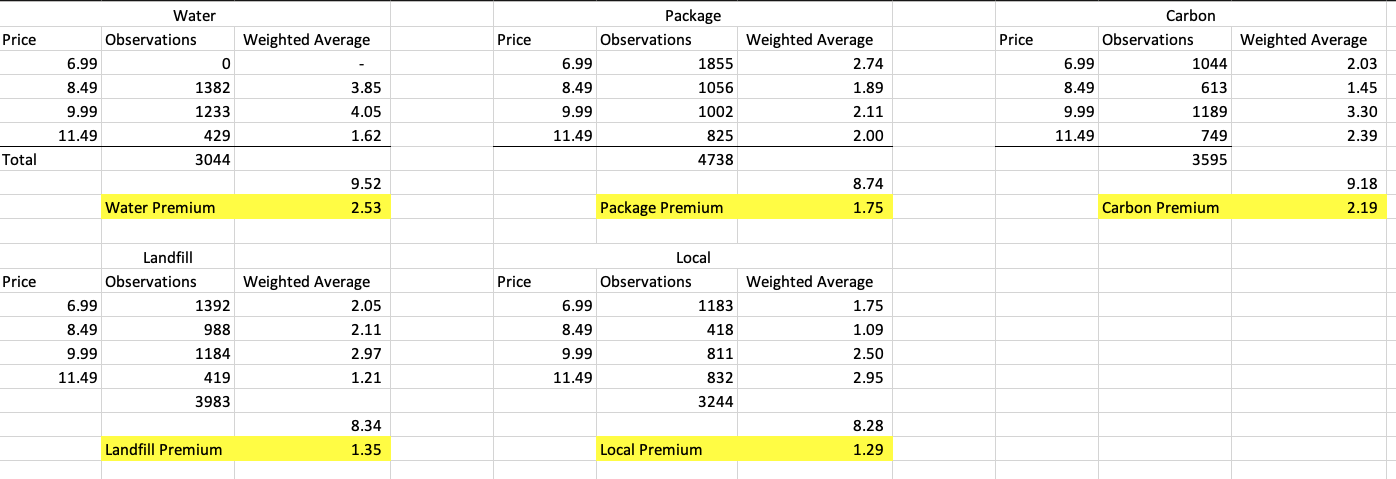

Out of the 10,328 observations of those individuals who selected beer with sustainability practices we see that most consumers are willing to pay a premium for sustainability practices in water, energy, waste matter reduction and also for locally produced beer.

The majority of consumers sampled were most willing to pay a premium for water conservation (3044), followed by waste matter reduction (2591) and lastly energy conservation (2551).
There was no statistically significant willingness to pay for the 'localness' attribute (premium $1.29 for 29.09% of observations)

Based on Table1 and the premium calculation table below:

Willingness to pay a premium for Water sustainability practices:
(1328 + 1233 + 429) / (2491 + 3283 + 1520) = 2990 / 7284 = 41.05% with an average premium of $2.53 

Willingness to pay a premium for Energy saving practices:
(613 + 1189 + 749) / (895 + 1321 + 2684 + 1833) = 2551 / 6733 = 37.89% with an average premium of $2.19 

Willingness to pay a premium for Waste reduction practices:
(988 + 1184 + 419) / (1185 + 951 + 2694 + 1515) = 2591 / 6345 = 40.84% with an average premium of $1.35

Willingness to pay a premium for Locally produced beer:
(418 + 811 + 832) / (1389 + 1516 + 1781 + 2398) = 2061 / 7084 = 29.09% with an average premium of $1.29 

Willingness to pay a premium for Packaging (preferred glass bottle over aluminum can):
(1056 + 1002 + 825) / (1375 + 878 + 1580 + 1757) = 2883 / 5590 = 51.57% with an average premium of $1.75 

We conclude that consumers are willing to pay premiums for sustainability practices in beer, and breweries could recover a premium from implementing environmentally sustainable practices and branding their product with the associated labelling.

